# Guild calculations and barplots

# 0) Import needed data

### a) Silva OTUs

In [1]:
# mirroring from `SF_Guild_OTU bars etc...

In [2]:
# otu_V <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')

In [3]:
suppressWarnings(suppressMessages(library(dplyr)))
library(magrittr)

In [4]:
# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <- SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!

In [5]:
#SilvaOTUs# [SilvaOTUs=='Archaea']

In [6]:
# SilvaOTUs["OTU"]  # row.names(SilvaOTUs) # 
otu_V <- SilvaOTUs

In [7]:
# Sort OTU table                                                                      
otu_V <- otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

In [8]:
#SilvaOTUs

In [9]:
# OTU_v <- read.table("SF_Sal_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          
# dim(OTU_v); head(OTU_v)
# OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          
# dim(OTU_v); head(OTU_v)

In [10]:
# Silva OTUs, Delta Only (Use code from Get_16S_correlations.ipynb)            
OTU_samps <- data.frame('Sample' = colnames(otu_V))                                        # OTU_samps
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)     
Meta_iTag <- merge(metaDB, OTU_samps, by = 'Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup == "FW",] # Freshwater
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup == "Oligo",] # Oligo
Meta_iTag_Delta <- rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta
Delta_sites <- Meta_iTag_Delta[,"Sample"]                                # Delta sites
tax_cols <- unlist(list("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Taxonomy"))
Delta_tax <- append(Delta_sites, tax_cols)
Delta_OTU <- otu_V %>%
    dplyr::select(names(Delta_tax))

# 1) Calculate aggregate guild abundances

#### ***DUE TO ISSUES WITH SILVA***

- **NOTE CHANGED MOB IIa to Family=='Beijerinckiaceae', "MOB_IIa"** 
- FROM Family=='Methylocystaceae', "MOB_IIa",  (as in Kneif 2015)

due to taxonomic reassingment in SILVA (elsewhere)???  These were in Family=='Methylocystaceae' before
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylosinus"
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylocystis"

- **Note ALSO had to change (no CH4ac) **
- from: Order=='Methanosarcinales'
- to:   Order=='Methanosarciniales'

- also added Deferrisomatota to FeRB

In [11]:
# source("../modules/OTU_subsetting_modules_v.0.3_strip.R")   # ITAGGER VERSION # MOB IIa == Methylocystaceae
source("../modules/3_OTU_subsetting_modules_v.0.4_strip.r")  # SILVA VERSION    # MOB IIa == Beijerinckiaceae 

In [12]:
head(otu_V, n = 20)

,OTU,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
otu_1614,otu_1614,0.000000,0.000000,0.0000,0.00000,11.6117,0.00000,15.624023,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__;c__;o__;f__;g__,Archaea,,PH,PH,PH,PH,
otu_3660,otu_3660,0.000000,7.899331,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__;c__;o__;f__;g__,Archaea,,PH,PH,PH,PH,
otu_4420,otu_4420,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__;c__;o__;f__;g__,Archaea,,PH,PH,PH,PH,
otu_4814,otu_4814,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Aenigmarchaeota;c__Aenigmarchaeia;o__Aenigmarchaeales;f__;g__,Archaea,Aenigmarchaeota,Aenigmarchaeia,Aenigmarchaeales,AenigmarchaealesOR,AenigmarchaealesOR,Aenigmarchaeota
otu_1912,otu_1912,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,7.241759,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Cand. Altiarchaeum,Archaea,Altiarchaeota,Altiarchaeia,Altiarchaeales,Altiarchaeaceae,Cand. Altiarchaeum,Altiarchaeota
otu_5947,otu_5947,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,7.241759,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Altiarchaeota;c__Altiarchaeia;o__Altiarchaeales;f__Altiarchaeaceae;g__Cand. Altiarchaeum,Archaea,Altiarchaeota,Altiarchaeia,Altiarchaeales,Altiarchaeaceae,Cand. Altiarchaeum,Altiarchaeota
otu_1561,otu_1561,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,7.812012,0.000000,0.00000,⋯,0.000000,6.88056,k__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__;f__;g__,Archaea,Asgardarchaeota,Lokiarchaeia,LokiarchaeiaCL,LokiarchaeiaCL,LokiarchaeiaCL,Asgardarchaeota
otu_5167,otu_5167,0.000000,0.000000,0.0000,0.00000,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,0.000000,0.00000,k__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__;f__;g__,Archaea,Asgardarchaeota,Lokiarchaeia,LokiarchaeiaCL,LokiarchaeiaCL,LokiarchaeiaCL,Asgardarchaeota
otu_1022,otu_1022,0.000000,7.899331,0.0000,31.03036,0.0000,0.00000,0.000000,0.000000,0.00000,⋯,8.772315,27.52224,k__Archaea;p__Crenarchaeota;c__;o__;f__;g__,Archaea,Crenarchaeota,CrenarchaeotaPH,CrenarchaeotaPH,CrenarchaeotaPH,CrenarchaeotaPH,Crenarchaeota


In [13]:
rownames(otu_V)[1:10]

[1] "otu_1614" "otu_3660" "otu_4420" "otu_4814" "otu_1912" "otu_5947"
 [7] "otu_1561" "otu_5167" "otu_1022" "otu_1024"

In [14]:
# use function for getting 16s Guilds
Guild_OTUs2 <- Get_16S_Guilds(otu_V)              # use Get_16S_Guilds to get guilds
OTU_guilds2 <- merge(Guild_OTUs2, otu_V)
# Guild_OTUs <- Get_16S_Guilds(SilvaOTUs)              # use Get_16S_Guilds to get guilds

# Update - use 4 methanogen guilds! (CH4_ac, CH4_H2, CH4_me, CH4_mix)
### Also some other updates
### Include Methermicoccaceae (doesn't start with Methano)
### Remove Methanoperedens (starts with Methano but isn't methanogen). Also remove ANME and Syntrophoarchaeaceae.
### Mixotrophs are Methanosarcinaceae and Methanobacteriaceae
### Acetoclasts are Methanosaetaceae and Methanotrichaceae
### CH4_me are Methanomassiliicoccales, Methanonatronarchaeales, Methermicoccaceae
### CH4_H2 are all others

In [15]:
# use alternate function to get new methanogen guilds
Guild_OTUs4 <- Get_16S_Guilds_alt(otu_V)
Guild_OTUs <- Get_16S_Guilds_alt(otu_V)

In [16]:
OTU_guilds4 <- merge(Guild_OTUs4, otu_V)
OTU_guilds <- merge(Guild_OTUs, otu_V)

In [17]:
# dim(Guild_OTUs); head(Guild_OTUs)

In [18]:
#Guild_OTUs[Guild_OTUs['Guild'] == 'CH4_H2']
#Guild_OTUs[Guild_OTUs['Guild'] == 'SRB']

In [19]:
#otu_V["OTU"] <- row.names(otu_V)
# OTU_guilds <- merge(Guild_OTUs, otu_V)#, by="OTU")# all.y=TRUE)
head(OTU_guilds)# ; tail(OTU_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,otu_1019,SRB,0.0000,15.79866,0.000,0.00000,0.0000,0.00000,15.624023,0.000000,⋯,8.772315,0.00000,k__Bacteria;p__Desulfobacterota;c__Desulfobulbia;o__Desulfobulbales;f__Desulfobulbaceae;g__,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfobulbaceae,DesulfobulbaceaeFA,Desulfobacterota
2,otu_1025,MOB_II,0.0000,0.00000,0.000,0.00000,0.0000,0.00000,0.000000,0.000000,⋯,0.000000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
3,otu_103,SRB,354.0123,134.28863,0.000,62.06073,336.7394,114.87915,1859.258796,811.076994,⋯,0.000000,6.88056,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatirhabdium,Bacteria,Desulfobacterota,Desulfobacteria,Desulfobacterales,Desulfosarcinaceae,Desulfatirhabdium,Desulfobacterota
4,otu_1034,SRB_syn,0.0000,0.00000,0.000,0.00000,0.0000,0.00000,0.000000,0.000000,⋯,0.000000,0.00000,k__Bacteria;p__Desulfobacterota;c__Syntrophobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__Syntrophobacter,Bacteria,Desulfobacterota,Syntrophobacteria,Syntrophobacterales,Syntrophobacteraceae,Syntrophobacter,Desulfobacterota
5,otu_104,AOB,0.0000,23.69799,1771.479,31.03036,0.0000,53.61027,62.496094,0.000000,⋯,3658.055178,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32,Gammaproteobacteria
6,otu_1051,MOB_I,0.0000,0.00000,0.000,15.51518,0.0000,7.65861,7.812012,7.241759,⋯,61.406202,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera,Gammaproteobacteria


In [20]:
levels(OTU_guilds[,2])

[1] "CH4_mix" "CH4_H2"  "CH4_ac"  "CH4_me"  "MOB_I"   "MOB_II"  "MOB_IIa"
 [8] "ANME"    "AOA"     "AOB"     "NOB"     "Anamx"   "SOxB"    "SRB_syn"
[15] "SRB"     "FeOB"    "FeRB"

In [21]:
# write.table(OTU_guilds, "Silva_OTU_Guild_taxa_counts.txt", row.names=T, col.names=T, sep='\t')

In [22]:
# OTU_guilds['Guild'] == 'MOB_IIa'

In [23]:
#OTU_guilds[OTU_guilds['Guild'] == 'MOB_IIa',]

# 2) Plot guild abundances

In [24]:
# source("../modules/5_OTU_barplots_module_v0.3.7.R")
source("../modules/5_OTU_barplots_module_v0.4.R")       # working under R 4.0.2

In [25]:
# Get guilds color scheme and update to have 17 colors for the 2 new methanogen guilds
# Note no MeOB anymore, but ANME present so sub that in
#Guild_cols <- read.table("../data/colors/Guild_color_palette.txt", sep='\t')
#Guild_vars <-c("Guild", "G_index", "color")
#Guild_cols <- Guild_cols[Guild_vars]
#colnames(Guild_cols) <- c("Guild", "Index", "color")
#Guild_cols['Index'] <- rev(Guild_cols[,'Index'])
Guild_cols <- read.table("../data/colors/Guild_color_palette.txt", sep='\t') %>%
  dplyr::select(Guild, G_index, color) %>%
  set_names(c("Guild", "Index", "color")) %>%
  mutate(Index = rev(Index)) %>%
  add_row(Guild = "CH4_me", Index = 16, color = "#FDC086") %>%
  add_row(Guild = "CH4_mix", Index = 17, color = "#FFFF99") %>%
  arrange(Index) %>%
  mutate(Guild = gsub("MeOB", "ANME", Guild))
Guild_cols

,Guild,Index,color
,<chr>,<dbl>,<chr>
15,FeRB,1,#8B4513
14,FeOB,2,#CD6600
13,SRB,3,#8B008B
12,SRB_syn,4,#CD2990
11,SOxB,5,#CD69C9
10,Anamx,6,#00FF7F
9,NOB,7,#008B00
8,AOB,8,#00CD00
7,AOA,9,#7CFC00


In [26]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <- c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)                          

In [27]:
## REPLOT without SRB
#nope <- as.list("SRB, SRB_syn")
noSRB <- OTU_guilds[!OTU_guilds$Guild=="SRB",]
noSRBs <- noSRB[!noSRB$Guild=="SRB_syn",]
noSROBs <- noSRBs[!noSRBs$Guild=="SOxB",]
noFeRB <- noSROBs[!noSROBs$Guild=="FeRB",]
noFeROB <- noFeRB[!noFeRB$Guild=="FeOB",]
clean_guilds <- noFeROB[!noFeROB$Guild=="MeOB",]
#Guilds_noSRB <- OTU_guilds[!SRB]
#Guilds_noSRB
head(clean_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.000000,⋯,0.00000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
5,otu_104,AOB,0.00000,23.69799,1771.479,31.03036,0.00000,53.61027,62.496094,0.000000,⋯,3658.05518,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32,Gammaproteobacteria
6,otu_1051,MOB_I,0.00000,0.00000,0.000,15.51518,0.00000,7.65861,7.812012,7.241759,⋯,61.40620,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera,Gammaproteobacteria
13,otu_1067,NOB,377.10002,94.79197,0.000,124.12145,359.96284,137.85498,320.292482,173.802213,⋯,0.00000,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira,Nitrospirota
15,otu_1072,AOB,177.00613,110.59063,0.000,62.06073,81.28193,122.53776,70.308106,50.692312,⋯,26.31694,48.16392,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1,Gammaproteobacteria
30,otu_1156,NOB,38.47959,86.89264,1771.479,155.15182,92.89364,176.14803,124.992188,94.142865,⋯,0.00000,13.76112,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL,Nitrospirota


In [28]:
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [29]:
#metaDB

## Figure 4 (formerly 4a)

Using Guild as id variables



pdf 
  2

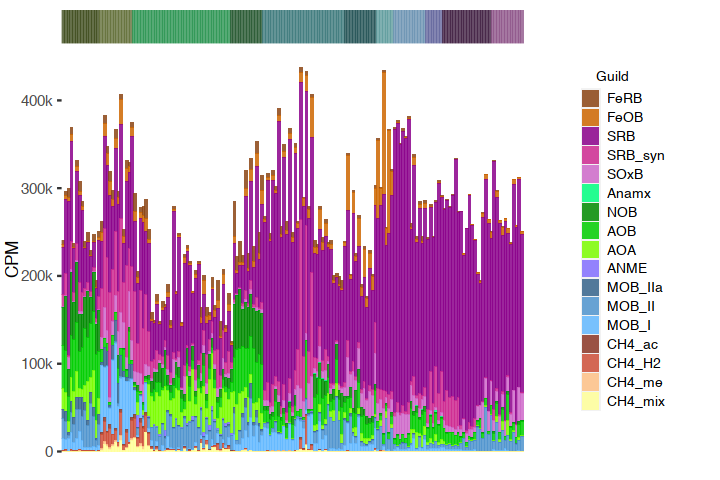

In [32]:
source("../modules/5_OTU_barplots_module_v0.4.R") # Reload here for convenience

Site_sort_G <- abund_loc_barplot_guild(OTU_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)

options(repr.plot.width=6, repr.plot.height=4) 
Site_sort_G

pdf("../figs/Figure4.pdf", width = 6, height = 4)
Site_sort_G
dev.off()

Using Guild as id variables



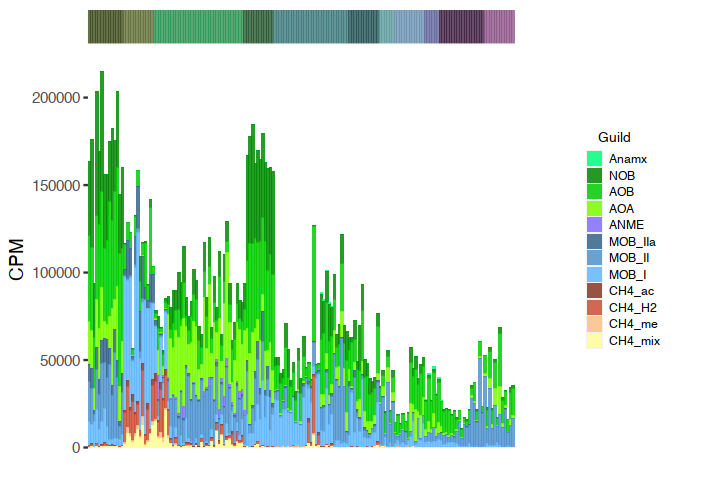

In [58]:
Site_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)
Site_sort_G

## Check 4 methanogen guilds

Using Guild as id variables



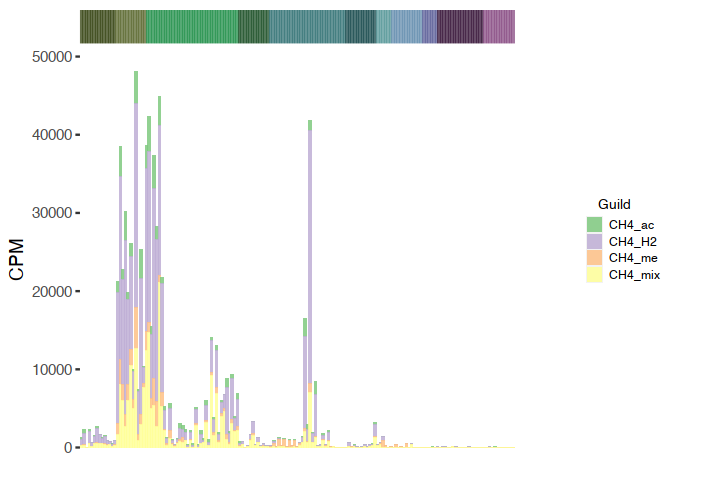

In [59]:
methanogen_cols_4 <- data.frame("Guild" = c("CH4_ac", "CH4_H2", "CH4_me", "CH4_mix"),
                              "Index" = c(1,2,3,4),
                              "color" = c("#7FC97F", "#BEAED4", "#FDC086", "#FFFF99"))
methanogen_subset_4 <- subset(OTU_guilds4, Guild == "CH4_ac" | Guild == "CH4_H2" | Guild == "CH4_mix" | Guild == "CH4_me")
methanogen_guilds_4 <- abund_loc_barplot(methanogen_subset_4, "Guild", metaDB, "EWsiteHyd_index", "", methanogen_cols_4)
options(repr.plot.width = 6, repr.plot.height = 4) 
methanogen_guilds_4

Using Guild as id variables



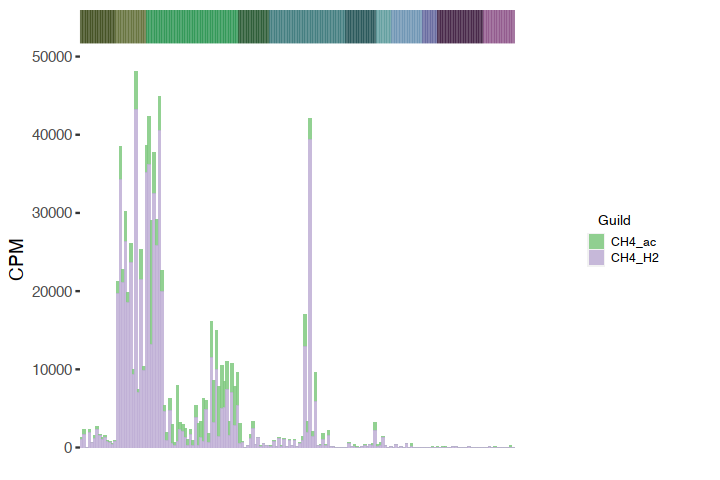

In [60]:
# Compare that to the two used in the paper
methanogen_cols_2 <- data.frame("Guild" = c("CH4_ac", "CH4_H2"),
                              "Index" = c(1,2),
                              "color" = c("#7FC97F", "#BEAED4"))
methanogen_subset_2 <- subset(OTU_guilds2, Guild == "CH4_ac" | Guild == "CH4_H2")
methanogen_guilds_2 <- abund_loc_barplot(methanogen_subset_2, "Guild", metaDB, "EWsiteHyd_index", "", methanogen_cols_2)
options(repr.plot.width = 6, repr.plot.height = 4) 
methanogen_guilds_2

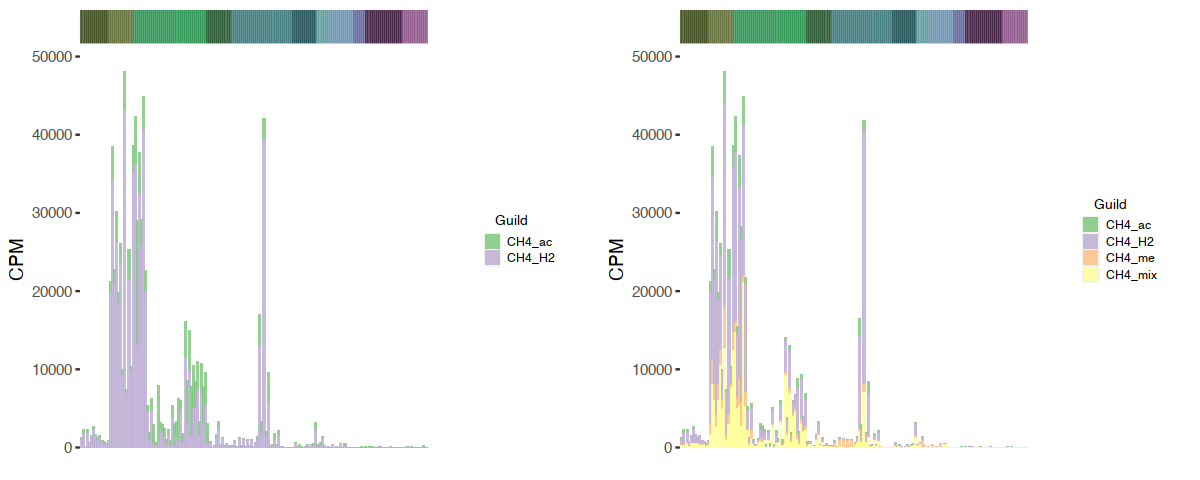

In [61]:
# Save multipanel
compare_methanogen_guilds <- plot_grid(methanogen_guilds_2, methanogen_guilds_4, align = "hv", axis = "trbl")
options(repr.plot.width = 10, repr.plot.height = 4) 
compare_methanogen_guilds
# pdf("../figs/GuildComparison_Methanogens2v4.pdf", width = 10, height = 4)
# compare_methanogen_guilds
# dev.off()

### sort by CH4

In [62]:
# metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [63]:
min(metaDB['CH4_ug_m2_h'])

[1] -0.3413328

In [64]:
# Get log CH4 data, note n + 1 here is 0 = min + 5%
metaDB['CH4_logn1'] =  log10(metaDB['CH4_ug_m2_h'] - 1.05*min(metaDB['CH4_ug_m2_h']))

### plot it

Using Guild as id variables



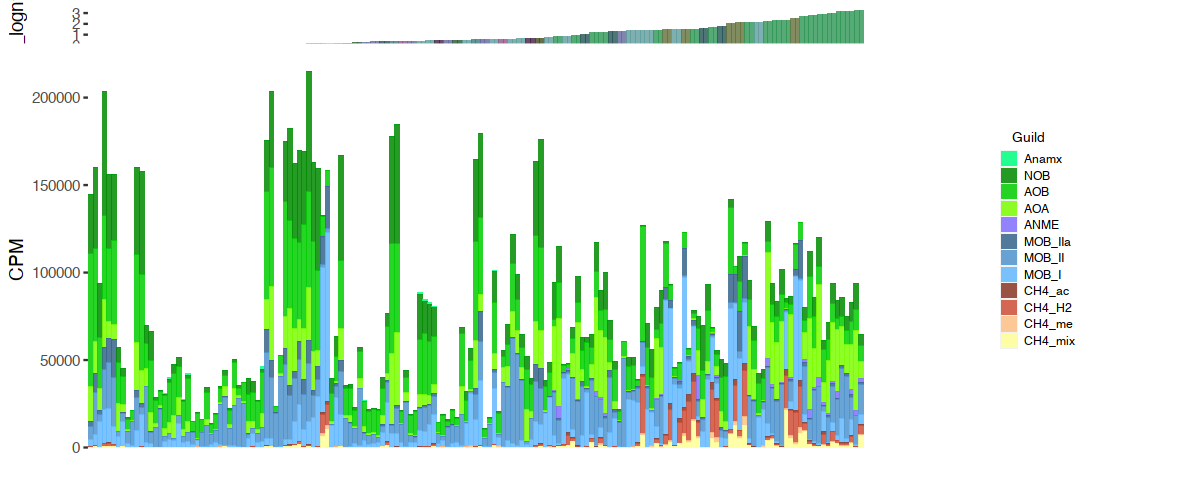

In [65]:
CH4_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols)
CH4_sort_G

Want to show as proportion, but not working!?  Similar works in tax comp. ipynb

In [66]:
# Want to show as proportion, but not working!?  Similar works in tax comp. ipynb
clean_guilds2 <- na.omit(clean_guilds)  # ah, some strange NAs, and row indexing in function
dim(clean_guilds2)

[1] 220 178

Using Guild as id variables



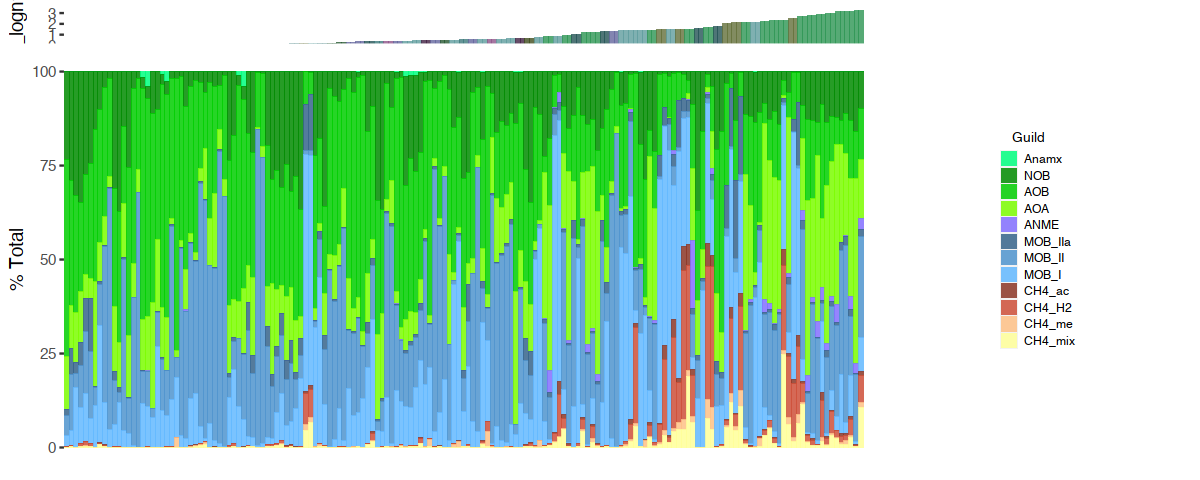

In [67]:
CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols, relab = '% Total')
# CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')

CH4_sort_G2

Using Guild as id variables



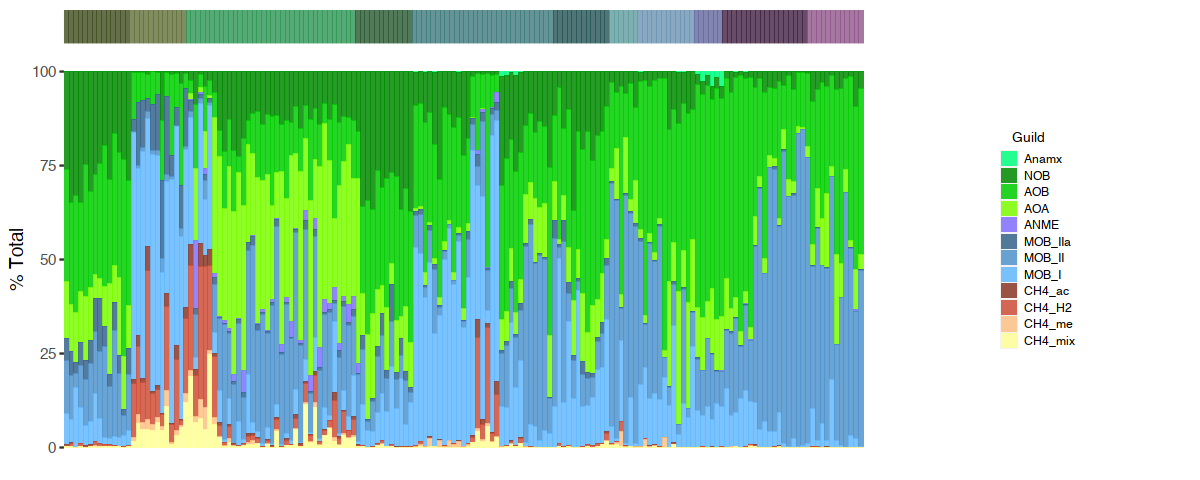

In [68]:
CH4_sort_G3 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')
CH4_sort_G3

# 3) Plot tradeoffs (Figure 4b)
- Note 2 axis plot MUCH better in python, unless I am missing something in ggplot
- Note, Cliff remade some plots, but this won't be included anyways because result changed

In [69]:
# aggregate guilds
Guild_abund <- agg_by_cat(OTU_guilds, "Guild")
head(Guild_abund)

,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,⋯,Muzzi_CordB_D1,Muzzi_CordB_D2,Muzzi_CordC_D1,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH4_mix,CH4_mix,238.57348,292.27524,0.000,465.4554,162.56386,505.46825,492.1567,477.95609,509.33952,⋯,0.000,34.481570,0.000,0.000,0.000000,0.00000,6.108325,0.0000,0.000,6.88056
CH4_H2,CH4_H2,784.98372,1429.77890,0.000,1489.4574,464.46818,819.47125,1749.8906,1064.53856,646.46940,⋯,0.000,13.792628,0.000,0.000,0.000000,0.00000,12.216650,0.0000,0.000,6.88056
CH4_ac,CH4_ac,207.78981,466.06052,0.000,248.2429,58.05852,107.22054,249.9844,79.65935,58.76995,⋯,0.000,6.896314,0.000,0.000,7.696748,0.00000,0.000000,0.0000,0.000,0.00000
CH4_me,CH4_me,38.47959,86.89264,0.000,108.6063,11.61170,53.61027,171.8643,79.65935,19.58998,⋯,0.000,13.792628,0.000,0.000,0.000000,0.00000,0.000000,0.0000,0.000,0.00000
MOB_I,MOB_I,13590.99270,11027.46597,15057.573,19207.7948,9405.48072,13241.73636,19686.2696,10515.03389,3487.01674,⋯,1423.154,882.728182,3047.100,1343.874,169.328459,40.08627,513.099303,843.7039,140.357,729.33940
MOB_II,MOB_II,22826.09532,20459.26710,3542.958,23117.6206,20378.54157,33468.12487,25967.1271,27721.45299,42500.46526,⋯,9254.921,23019.895866,9157.048,17312.702,11121.801039,21967.27357,7995.797472,11600.9281,16605.991,13251.95924


In [70]:
Guild_abundT <- data.frame(t(Guild_abund[,-1]))
Guild_abundT['Methanogen'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])
Guild_abundT['Methanotroph'] <- (Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['Methanogen_Troph'] <- Guild_abundT['Methanogen']/Guild_abundT[,'Methanotroph']
#Guild_abundT['Methanogen_Troph'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])/Guild_abundT[,'Methanotroph']


#Guild_abundT['Methanogen_Troph'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])/(Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['AOA_NOB'] <- (Guild_abundT[,"AOA"])/(Guild_abundT[,"NOB"])# + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['AOB_NOB'] <- (Guild_abundT[,"AOB"])/(Guild_abundT[,"NOB"])
Guild_abundT['AO_NOB'] <- (Guild_abundT[,"AOA"]+Guild_abundT[,"AOB"])/(Guild_abundT[,"NOB"])# + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])

#Guild_abundT['Methanogen : Troph'] <-  with(Guild_abundT, ("CH4_H2" + "CH4_ac")/("MOB_I" + "MOB_II" + "MOB_IIa"))
head(Guild_abundT)

,CH4_mix,CH4_H2,CH4_ac,CH4_me,MOB_I,MOB_II,MOB_IIa,ANME,AOA,AOB,⋯,SRB_syn,SRB,FeOB,FeRB,Methanogen,Methanotroph,Methanogen_Troph,AOA_NOB,AOB_NOB,AO_NOB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sandmound_TuleA_D1,238.5735,784.9837,207.78981,38.47959,13590.993,22826.095,9681.466,0,24742.38,49023.00,⋯,12929.144,54494.80,2732.051,5063.915,992.7735,46098.55,0.02153589,0.5819005,1.1529412,1.734842
Sandmound_TuleA_D2,292.2752,1429.7789,466.06052,86.89264,11027.466,20459.267,11367.137,0,21944.34,47522.37,⋯,25025.080,83851.40,5031.874,4597.411,1895.8394,42853.87,0.04423963,0.3564280,0.7718758,1.128304
Sandmound_TuleB_D1,0.0000,0.0000,0.00000,0.00000,15057.573,3542.958,2657.219,0,12400.35,29229.41,⋯,1771.479,175376.44,5314.438,9743.136,0.0000,21257.75,0.00000000,0.4000000,0.9428571,1.342857
Sandmound_TuleB_D2,465.4554,1489.4574,248.24291,108.60627,19207.795,23117.621,12427.660,0,27663.57,47926.40,⋯,31976.789,114610.65,7711.045,7928.258,1737.7003,54753.08,0.03173704,0.3893013,0.6744541,1.063755
Sandmound_TuleC_D1,162.5639,464.4682,58.05852,11.61170,9405.481,20378.542,8464.933,0,29075.71,59277.75,⋯,10253.135,49419.41,1881.096,4725.964,522.5267,38248.95,0.01366120,0.6940133,1.4149113,2.108925
Sandmound_TuleC_D2,505.4682,819.4712,107.22054,53.61027,13241.736,33468.125,13073.247,0,30358.73,54950.53,⋯,19613.700,82567.47,4939.803,7206.752,926.6918,59783.11,0.01550090,0.4444943,0.8045526,1.249047


In [71]:
# Write table for LASSO 
# write.table(Guild_abundT, "Silva_OTU_Guild_abundT_counts.txt", row.names=T, col.names=T, sep='\t')

In [72]:
# Add sample, merge with site class RESTORED or NOT
Guild_abundT["Sample"] <- row.names(Guild_abundT)                      #head(Guild_abundT)

# Get sample names & Restoration & relevel 
restor <-c("Sample", "EWcoastGroup")
Samp_restor <- metaDB[restor]
levels(Samp_restor$EWcoastGroup) <-c("Historic", "Restored")
colnames(Samp_restor) <-c("Sample", "restor")
# Merge with Guilds
Guild_abundT_rest <- merge(Guild_abundT, Samp_restor)

head(Guild_abundT_rest)

,Sample,CH4_mix,CH4_H2,CH4_ac,CH4_me,MOB_I,MOB_II,MOB_IIa,ANME,AOA,⋯,SRB,FeOB,FeRB,Methanogen,Methanotroph,Methanogen_Troph,AOA_NOB,AOB_NOB,AO_NOB,restor
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Browns_ThreeSqA_D1,227.8226,164.97502,15.711906,31.42381,15444.804,14211.419,3385.916,0.000000,27810.074,⋯,36883.70,3810.137,16638.91,180.6869,33042.14,0.005468379,0.5937605,1.2022811,1.7960416,SF_Ref
2,Browns_ThreeSqA_D2,598.8107,668.43989,20.888747,41.77749,37098.414,21891.406,17664.917,0.000000,9692.378,⋯,112952.42,13229.539,12881.39,689.3286,76654.74,0.008992642,0.2010979,0.9034961,1.1045940,SF_Ref
3,Browns_ThreeSqB_D1,113.6872,99.47633,14.210904,0.00000,16690.707,12633.494,3105.083,7.105452,22311.119,⋯,42959.56,6650.703,17557.57,113.6872,32429.28,0.003505697,0.4913928,1.3771518,1.8685446,SF_Ref
4,Browns_ThreeSqB_D2,188.8943,346.30617,0.000000,12.59295,28825.266,9520.272,7398.359,18.889428,9255.820,⋯,149119.44,14928.944,14211.15,346.3062,45743.90,0.007570544,0.1581155,0.7776702,0.9357857,SF_Ref
5,Browns_ThreeSqC_D1,141.8948,94.59651,6.756894,20.27068,9452.894,18912.546,3696.021,6.756894,27737.049,⋯,54007.85,6547.430,24946.45,101.3534,32061.46,0.003161222,0.5557060,1.0050088,1.5607148,SF_Ref
6,Browns_ThreeSqC_D2,65.8299,197.48969,7.314433,29.25773,18403.113,4235.057,2267.474,0.000000,18659.118,⋯,112152.20,15828.433,17510.75,204.8041,24905.64,0.008223201,0.3192341,0.9445626,1.2637968,SF_Ref


In [73]:
max(Guild_abundT_rest$AO_NOB)
min(Guild_abundT_rest$AO_NOB)
max(Guild_abundT_rest$Methanotroph)
min(Guild_abundT_rest$Methanotroph)
max(Guild_abundT_rest$Methanogen_Troph)
min(Guild_abundT_rest$Methanogen_Troph)

max(Guild_abundT_rest$Methanotroph)/max(Guild_abundT_rest$Methanogen_Troph)

[1] 118.875

[1] 0.9357857

[1] 122940.7

[1] 3206.189

[1] 1.868829

[1] 0

[1] 65784.87

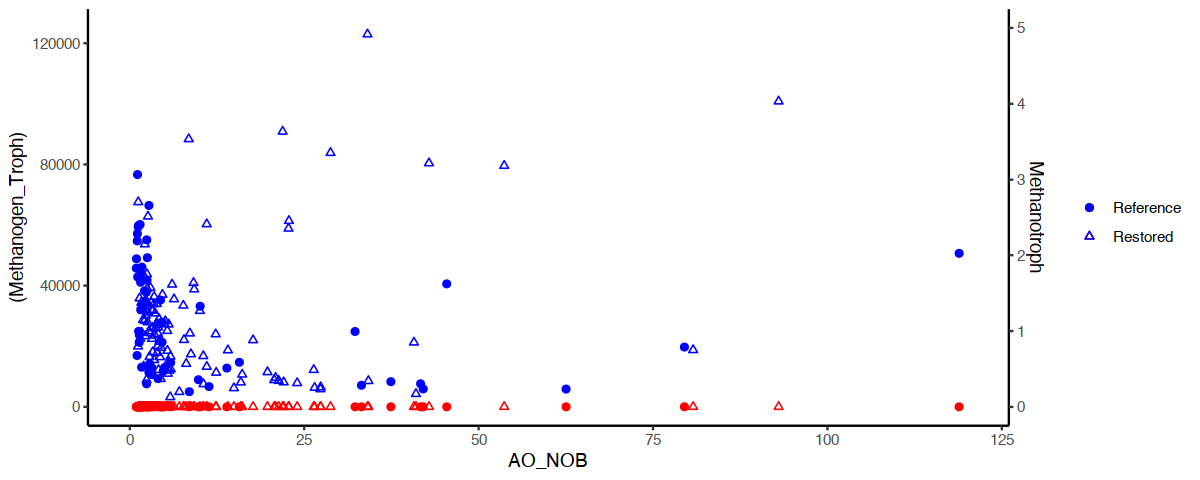

In [74]:
# Wyatt Two Axis Plot
# p <- ggplot(Guild_abundT_rest, aes(x=AOA_NOB))  
# p + ggplot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanotroph)))# + 
# coord_trans(x="log") +
# scale_y_continuous(limits = c(0, 60000)) +
# p <- p + scale_x_continuous(limits = c(0, 6), trans='log10') #+ scale_y_continuous(limits = c(0, 6000)) +

p <- ggplot(Guild_abundT_rest, aes(x = AO_NOB))  +
    geom_point(aes(y = (Methanogen_Troph), shape = restor), color = "red") + 
    geom_point(aes(y = (Methanotroph), shape = restor), color = "blue") +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored")) +
    scale_y_continuous(sec.axis = sec_axis(~./25000, name = "Methanotroph"), limits = c(0, 125000)) + 
    scale_x_continuous(limits = c(0, 120)) + 
    theme_bw() + 
    theme(panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank())
p

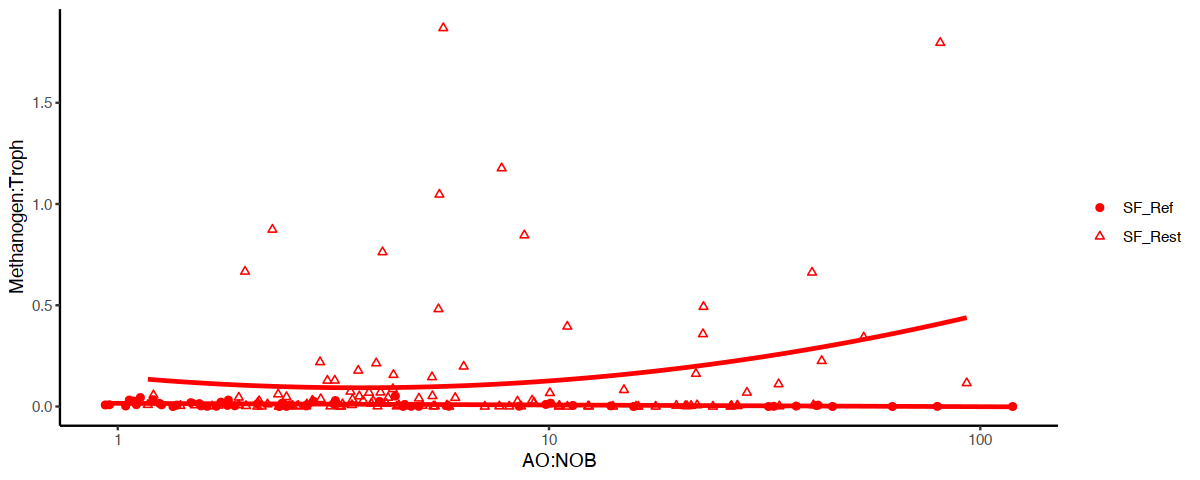

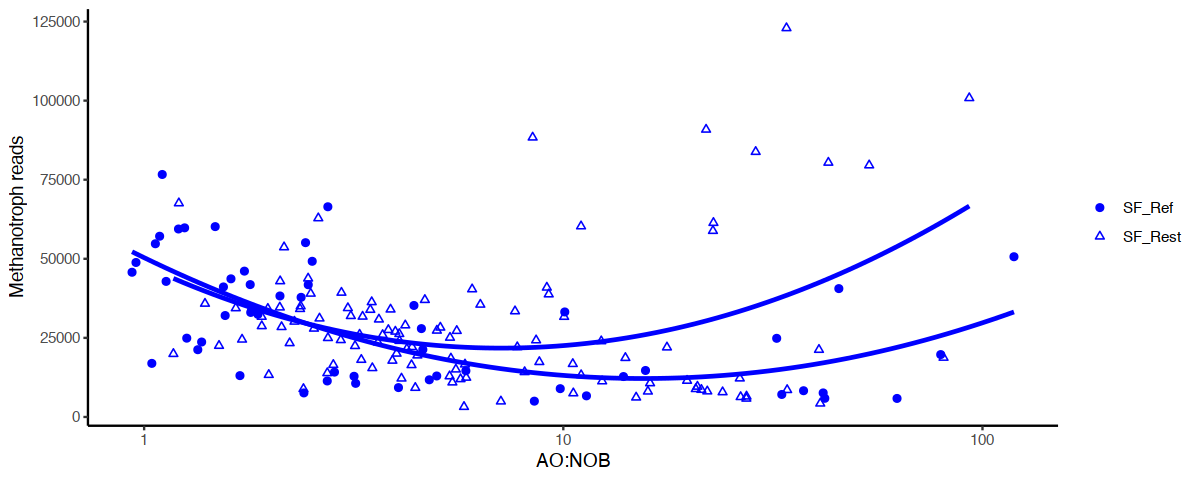

In [75]:
# Plot each separately, untransformed to ensure accuracy in the two plot graph
# Trends are much different with new guilds though
ggplot(Guild_abundT_rest, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest, aes(x = AO_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AO:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))


## Figure 4b (probably don't use anymore though)

### Check stats - 4 linear regression, 4 polynomial regression

In [76]:
# Make data frame and log AO:NOB
Guild_abundT_rest$logAO_NOB <- log10(Guild_abundT_rest$AO_NOB)
Guild_abundT_rest$logAOA_NOB <- log10(Guild_abundT_rest$AOA_NOB + 1)
Guild_abundT_rest$logAOB_NOB <- log10(Guild_abundT_rest$AOB_NOB)
restored <- subset(Guild_abundT_rest, restor == "SF_Rest")
reference <- subset(Guild_abundT_rest, restor == "SF_Ref")

In [77]:
# Linear
print('Restored AO:NOB Methanotroph Linear')
m1 <- lm(logAO_NOB ~ Methanotroph, data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanotroph Linear')
m1 <- lm(logAO_NOB ~ Methanotroph, data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AO:NOB Methanogen:Troph Linear')
m1 <- lm(logAO_NOB ~ Methanogen_Troph, data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanogen:Troph Linear')
m1 <- lm(logAO_NOB ~ Methanogen_Troph, data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

# Polynomial
print('Restored AO:NOB Methanotroph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanotroph, 2), data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanotroph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanotroph, 2), data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AO:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanogen_Troph, 2), data = restored)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AO:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanogen_Troph, 2), data = reference)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

[1] "Restored AO:NOB Methanotroph Linear"


[1] 0.01

[1] 0.2136399

[1] "Reference AO:NOB Methanotroph Linear"


[1] 0.23

[1] 0.000240532

[1] "Restored AO:NOB Methanogen:Troph Linear"


[1] 0.03

[1] 0.06245301

[1] "Reference AO:NOB Methanogen:Troph Linear"


[1] 0.15

[1] 0.003350701

[1] "Restored AO:NOB Methanotroph Polynomial"


[1] 0.31

[1] 0.1388006

[1] "Reference AO:NOB Methanotroph Polynomial"


[1] 0.25

[1] 0.0002335366

[1] "Restored AO:NOB Methanogen:Troph Polynomial"


[1] 0.03

[1] 0.06362656

[1] "Reference AO:NOB Methanogen:Troph Polynomial"


[1] 0.23

[1] 0.002311519

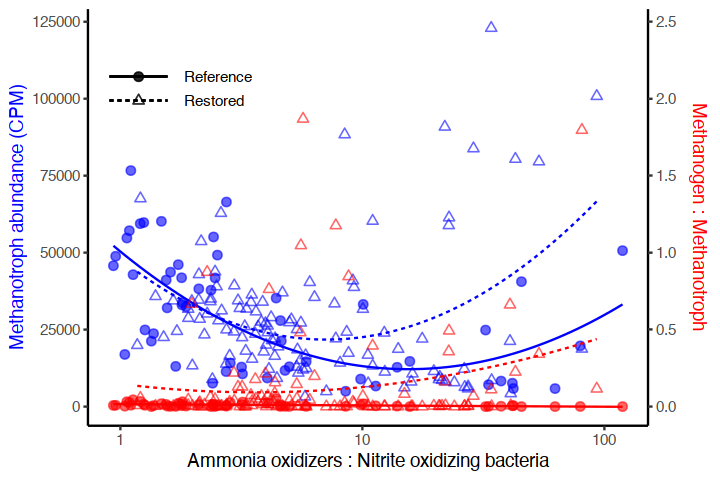

In [78]:
# Cliff updated two axis plot
# Note that only reference lines are significant and this works out as they are solid versus dashed!
options(repr.plot.width = 6, repr.plot.height = 4)
p1 <- ggplot(Guild_abundT_rest, aes(AO_NOB, Methanotroph))  +
    geom_point(aes(AO_NOB, Methanotroph, shape = restor), size = 2, alpha = 0.6, color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    geom_point(aes(AO_NOB, Methanogen_Troph*50000, shape = restor), size = 2, alpha = 0.6, color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph*50000, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph*50000, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored"),
                       guide = guide_legend(override.aes = list(size = 3, alpha = 1, color = "black"))) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "Ammonia oxidizers : Nitrite oxidizing bacteria",
         y = "Methanotroph abundance (CPM)") +
    guides(shape = guide_legend(override.aes = list(color = "black"),
                                keywidth = 3, keyheight = 1),
           linetype = guide_legend(keywidth = 3, keyheight = 1)) +
    theme_bw() + 
    theme(legend.position = c(0.16, 0.82),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p1

# pdf("../figs/Figure4b_split.pdf", width = 6, height = 4)
# p1
# dev.off()

[1] "AO:NOB Methanotroph Polynomial"


[1] 0.27

[1] 0.1345395

[1] "AO:NOB Methanogen:Troph Polynomial"


[1] 0.02

[1] 0.04541689

[1] "Note neither of these curves is significant"


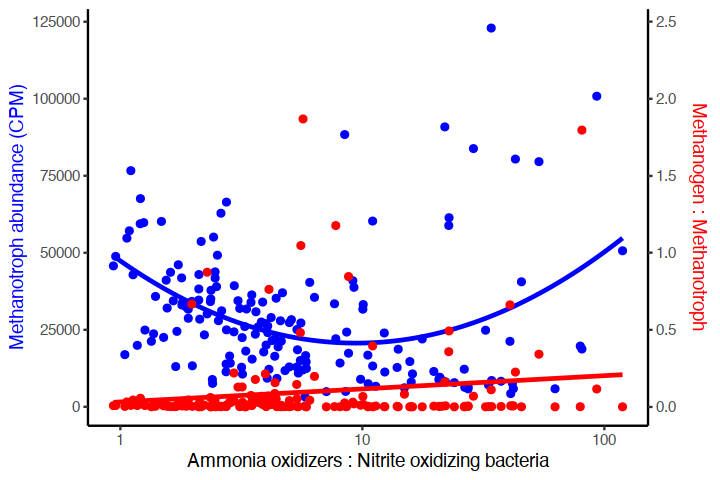

In [79]:
# Cliff updated two axis plot - one line each, don't distinguish ref vs restored
print('AO:NOB Methanotroph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanotroph, 2), data = Guild_abundT_rest)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('AO:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAO_NOB ~ poly(Methanogen_Troph, 2), data = Guild_abundT_rest)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Note neither of these curves is significant')

p2 <- ggplot(Guild_abundT_rest, aes(AO_NOB, Methanotroph))  +
    geom_point(aes(AO_NOB, Methanotroph), color = "blue") +
    stat_smooth(aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    geom_point(aes(AO_NOB, Methanogen_Troph*50000), color = "red") + 
    stat_smooth(aes(y = Methanogen_Troph*50000), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored")) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "Ammonia oxidizers : Nitrite oxidizing bacteria",
         y = "Methanotroph abundance (CPM)") +
    theme_bw() + 
    theme(panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p2

# pdf("../figs/Figure4b_lumped.pdf", width = 6, height = 4)
# p2
# dev.off()

NULL

ERROR: Error in value[[3L]](cond): invalid graphics state


plot without title

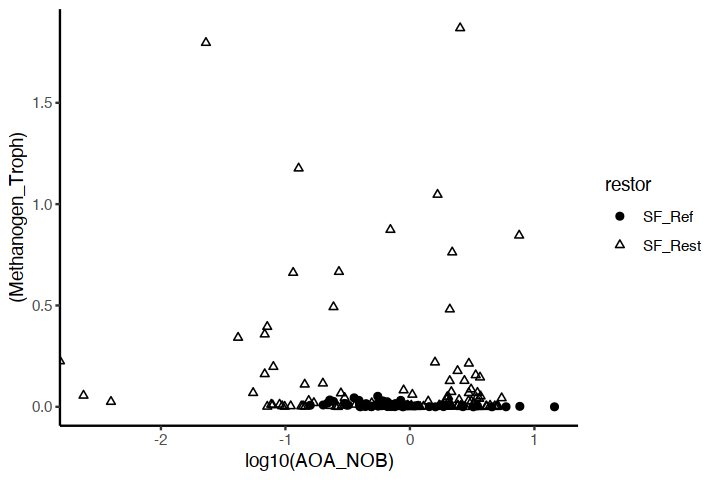

In [80]:
plot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanotroph), shape=restor)) + 
        geom_point(color="gray60") + scale_shape_manual(values=c(19, 2))  +
        #scale_x_continuous(limits = c(-2, 1)) +
        theme(legend.title=element_blank())       + 
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"), 
                legend.title=element_blank())

#ggplot(Guild_abundT, aes(x=AOA_NOB, y=Methanogen_Troph)) + geom_point()
ggplot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanogen_Troph), shape=restor)) + 
        geom_point() + scale_shape_manual(values=c(19, 2)) +
        #scale_x_continuous(limits = c(-2, 1)) +
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

## Check doing AOA and AOB separately
--plot separate panels

### AOA

In [ ]:
print('Restored AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanogen_Troph, 2), data = restored, na.action = na.exclude)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanogen_Troph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanotroph, 2), data = restored, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOA_NOB ~ poly(Methanotroph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Methanotroph relationships are significant')

ggplot(Guild_abundT_rest, aes(x = AOA_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOA:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest, aes(x = AOA_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOA:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

In [ ]:
# Combined, with only significant lines (methanotroph)
options(repr.plot.width = 6, repr.plot.height = 4)
p3 <- ggplot(Guild_abundT_rest, aes(AOA_NOB, Methanotroph))  +
    geom_point(aes(AOA_NOB, Methanotroph, shape = restor), size = 2, alpha = 0.6, color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    geom_point(aes(AOA_NOB, Methanogen_Troph*50000, shape = restor), size = 2, alpha = 0.6, color = "red") + 
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored"),
                       guide = guide_legend(override.aes = list(size = 3, alpha = 1, color = "black"))) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOA : NOB",
         y = "Methanotroph abundance (CPM)") +
    guides(shape = guide_legend(override.aes = list(color = "black"),
                                keywidth = 3, keyheight = 1),
           linetype = guide_legend(keywidth = 3, keyheight = 1)) +
    theme_bw() + 
    theme(legend.position = c(0.16, 0.82),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p3

### AOB

In [ ]:
print('Restored AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanogen_Troph, 2), data = restored, na.action = na.exclude)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanogen:Troph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanogen_Troph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Restored AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanotroph, 2), data = restored, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference AOA:NOB Methanotroph Polynomial')
m1 <- lm(logAOB_NOB ~ poly(Methanotroph, 2), data = reference, na.action = na.omit)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]

print('Reference relationships are significant')

ggplot(Guild_abundT_rest, aes(x = AOB_NOB)) +
    geom_point(aes(y=(Methanogen_Troph),shape = restor), color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanogen_Troph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOB:NOB",
         y = "Methanogen:Troph") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

ggplot(Guild_abundT_rest, aes(x = AOB_NOB)) +
    geom_point(aes(y=(Methanotroph), shape = restor), color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Rest"),
                aes(y = Methanotroph), 
                method = "lm", formula = y ~ x + I(x^2), size = 1, color = "blue", se = F) +
    scale_shape_manual(values = c(19, 2)) +
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOB:NOB",
         y = "Methanotroph reads") +
    theme_bw() +
    theme(legend.title=element_blank(),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"))

In [ ]:
# Combined, with only significant lines (reference)
options(repr.plot.width = 6, repr.plot.height = 4)
p4 <- ggplot(Guild_abundT_rest, aes(AOB_NOB, Methanotroph))  +
    geom_point(aes(AOB_NOB, Methanotroph, shape = restor), size = 2, alpha = 0.6, color = "blue") +
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanotroph, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "blue", se = F) +
    geom_point(aes(AOB_NOB, Methanogen_Troph*50000, shape = restor), size = 2, alpha = 0.6, color = "red") + 
    stat_smooth(data = subset(Guild_abundT_rest, restor == "SF_Ref"),
                aes(y = Methanogen_Troph*50000, linetype = restor), 
                method = "lm", formula = y ~ x + I(x^2), size = 0.5, color = "red", se = F) +
    scale_shape_manual(values = c(19, 2),
                       labels = c("Reference", "Restored"),
                       guide = guide_legend(override.aes = list(size = 3, alpha = 1, color = "black"))) +
    scale_linetype_manual(values = c(1, 2),
                          labels = c("Reference", "Restored"),
                          guide = guide_legend(override.aes = list(size = 1, alpha = 1, color = "black"))) +
    scale_y_continuous(sec.axis = sec_axis(~./50000, name = "Methanogen : Methanotroph")) +  
    scale_x_continuous(trans = 'log10') +
    labs(x = "AOB : NOB",
         y = "Methanotroph abundance (CPM)") +
    guides(shape = guide_legend(override.aes = list(color = "black"),
                                keywidth = 3, keyheight = 1),
           linetype = guide_legend(override.aes = list(color = "black"),
                                   keywidth = 3, keyheight = 1)) +
    theme_bw() + 
    theme(legend.position = c(0.16, 0.82),
          panel.border = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.title = element_blank(),
          axis.title.y.left = element_text(color = "blue"),
          axis.title.y.right = element_text(color = "red", margin = margin(t = 0, r = 0, b = 0, l = 10)))
p4

## 4) Delta methanotrophs, methanogens

In [81]:
# Read pre-calculated CORRELATION table (Here, OTU level)
CH4corrRanksOTU_Delta <- read.table("../taxon_analysis/correlations/CH4corrRanks_Silva_Delta_OTU.txt", sep = '\t')

# CORRELATION FILTER RESULTS
CorrFilt_OTU_Delta <- OTU_corr_filt_OTU(Delta_OTU, CH4corrRanksOTU_Delta, "Genus", 0.6)
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 

#### get Delta sites subset info

In [82]:
# Prune metadata to only iTag samples
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                                        # OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Separate Delta Sites (oligo and FW)
# levels(Meta_iTag$SALTgroup)
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <- rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta

Delta_sites <- Meta_iTag_Delta[,"Sample"]                                # Delta sites

# Subset OTU table by Delta sites
tax_cols <- c("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus")
Delta_tax <- c(Delta_sites, tax_cols)
guilds <- c('OTU', 'Guild')
Guild_delta_tax <- c(guilds, Delta_tax)
# Delta_OTU = otu_V[Delta_tax]

#### Subset clean guild data

In [83]:
# Delta_subset
head(clean_guilds2)
Delta_guilds <- clean_guilds2 %>%
    dplyr::select(all_of(Guild_delta_tax))

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.000000,0.000000,⋯,0.00000,0.00000,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
5,otu_104,AOB,0.00000,23.69799,1771.479,31.03036,0.00000,53.61027,62.496094,0.000000,⋯,3658.05518,2600.85181,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32,Gammaproteobacteria
6,otu_1051,MOB_I,0.00000,0.00000,0.000,15.51518,0.00000,7.65861,7.812012,7.241759,⋯,61.40620,20.64168,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera,Gammaproteobacteria
13,otu_1067,NOB,377.10002,94.79197,0.000,124.12145,359.96284,137.85498,320.292482,173.802213,⋯,0.00000,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira,Nitrospirota
15,otu_1072,AOB,177.00613,110.59063,0.000,62.06073,81.28193,122.53776,70.308106,50.692312,⋯,26.31694,48.16392,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1,Gammaproteobacteria
30,otu_1156,NOB,38.47959,86.89264,1771.479,155.15182,92.89364,176.14803,124.992188,94.142865,⋯,0.00000,13.76112,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL,Nitrospirota


In [84]:
head(Delta_guilds)

,OTU,Guild,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D2,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D2,⋯,MayberrySE_TuleB_D2,MayberrySE_TuleC_D1,MayberrySE_TuleC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,932.003523,964.05331,462.37352,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
5,otu_104,AOB,62.496094,0.000000,0.000000,0.00000,101.00925,0.00000,0.00000,19.20289,⋯,164.805501,124.96987,40.20639,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__oc32,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,oc32
6,otu_1051,MOB_I,7.812012,7.241759,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,0.000000,8.92642,0.00000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
13,otu_1067,NOB,320.292482,173.802213,754.214295,325.23544,1069.01457,1018.77950,207.14043,288.04332,⋯,11.365897,8.92642,0.00000,k__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__Nitrospiraceae;g__Nitrospira,Bacteria,Nitrospirota,Nitrospiria,Nitrospirales,Nitrospiraceae,Nitrospira
15,otu_1072,AOB,70.308106,50.692312,97.949908,240.39141,218.85338,237.71522,177.54894,96.01444,⋯,897.905834,473.10023,495.87884,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1
30,otu_1156,NOB,124.992188,94.142865,9.794991,28.28134,16.83488,22.63954,29.59149,86.41300,⋯,5.682948,196.38123,268.04262,k__Bacteria;p__Nitrospirota;c__4-29-1;o__;f__;g__,Bacteria,Nitrospirota,4-29-1,4-29-1CL,4-29-1CL,4-29-1CL


In [85]:
# Methanotroph subset
# levels(Delta_guilds$Guild) 
methanotrophs <- c('MOB_I','MOB_II','MOB_IIa')

Delta_mtrophs <- Delta_guilds[Delta_guilds$Guild %in% methanotrophs,]

In [86]:
head(Delta_mtrophs)

,OTU,Guild,Sandmound_CattailA_D1,Sandmound_CattailA_D2,Sandmound_ThreeSqA_D1,Sandmound_ThreeSqA_D2,Sandmound_ThreeSqB_D1,Sandmound_ThreeSqB_D2,Sandmound_ThreeSqC_D1,Sandmound_ThreeSqC_D2,⋯,MayberrySE_TuleB_D2,MayberrySE_TuleC_D1,MayberrySE_TuleC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,otu_1025,MOB_II,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,932.003523,964.05331,462.3735,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA
6,otu_1051,MOB_I,7.812012,7.241759,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,0.000000,8.92642,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
42,otu_1212,MOB_I,656.208987,470.714327,156.719853,325.2354,286.192877,396.19203,155.35532,547.282311,⋯,5.682948,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylococcaceae;g__Methylocaldum,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,Methylocaldum
54,otu_1261,MOB_I,7.812012,0.000000,9.794991,0.0000,0.000000,0.00000,0.00000,0.000000,⋯,0.000000,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Methylophilaceae;g__Methylotenera,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Methylophilaceae,Methylotenera
56,otu_1274,MOB_I,445.284670,94.142865,58.769945,0.0000,185.183626,90.55818,51.78511,76.811552,⋯,0.000000,17.85284,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__Crenothrix,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,Crenothrix
109,otu_1629,MOB_I,0.000000,0.000000,0.000000,0.0000,8.417438,0.00000,0.00000,9.601444,⋯,17.048845,0.00000,0.0000,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__IheB2-23,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,IheB2-23


In [87]:
# Delta_guilds$Guild

In [88]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = '% Total')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [89]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [90]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


#### Correlated genera

In [91]:
corr_Delta_mtrophs <- Delta_mtrophs[Delta_mtrophs$OTU %in% corrOTUs,]

In [92]:
abund_loc_barplot(corr_Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [93]:
# abund_loc_barplot(Delta_mtrophs, "Guild", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

### b) Methanogens

In [94]:
levels(Delta_guilds$Guild)

[1] "CH4_mix" "CH4_H2"  "CH4_ac"  "CH4_me"  "MOB_I"   "MOB_II"  "MOB_IIa"
 [8] "ANME"    "AOA"     "AOB"     "NOB"     "Anamx"   "SOxB"    "SRB_syn"
[15] "SRB"     "FeOB"    "FeRB"

In [95]:
# Methanogen subset
# levels(Delta_guilds$Guild) 
methanogens <- c('CH4_H2','CH4_ac')

Delta_mgens <- Delta_guilds[Delta_guilds$Guild %in% methanogens,]

In [96]:
options(repr.plot.width=7, repr.plot.height=4)

abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = 'CPM')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


In [97]:
abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument


#### Correlated genera

In [98]:
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 
#corrOTUs

In [99]:
corr_Delta_mgens <- Delta_mgens[Delta_mgens$OTU %in% corrOTUs,]

In [100]:
abund_loc_barplot(corr_Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



ERROR: Error in rep("", sum(samp_info_colorO[, color_var] == levels(samp_info_colorO[, : invalid 'times' argument
